# 快速入门教程

## 先决条件

在阅读本教程之前，你应该了解一些Python的基础知识。如果你想复习一下，请回去看看[Python教程](https://docs.python.org/zh-cn/3/tutorial/)。

如果您希望使用本教程中的示例，则还必须在计算机上安装某些软件。有关说明，请参阅[https://scipy.org/install.html](https://scipy.org/install.html)。

## 基础知识

NumPy的主要对象是同构多维数组。它是一个元素表（通常是数字），所有类型都相同，由非负整数元组索引。在NumPy维度中称为 *轴* 。

例如，3D空间中的点的坐标``[1, 2, 1]``具有一个轴。该轴有3个元素，所以我们说它的长度为3.在下图所示的例子中，数组有2个轴。第一轴的长度为2，第二轴的长度为3。

In [ ]:
[[ 1., 0., 0.],
 [ 0., 1., 2.]]

NumPy的数组类被调用``ndarray``。它也被别名所知
 ``array``。请注意，``numpy.array``这与标准Python库类不同``array.array``，后者只处理一维数组并提供较少的功能。``ndarray``对象更重要的属性是：

- **ndarray.ndim** - 数组的轴（维度）的个数。在Python世界中，维度的数量被称为rank。
- **ndarray.shape** - 数组的维度。这是一个整数的元组，表示每个维度中数组的大小。对于有 *n* 行和 *m* 列的矩阵，``shape`` 将是 ``(n,m)``。因此，``shape`` 元组的长度就是rank或维度的个数 ``ndim``。
- **ndarray.size** - 数组元素的总数。这等于 ``shape`` 的元素的乘积。
- **ndarray.dtype** - 一个描述数组中元素类型的对象。可以使用标准的Python类型创建或指定dtype。另外NumPy提供它自己的类型。例如numpy.int32、numpy.int16和numpy.float64。
- **ndarray.itemsize** - 数组中每个元素的字节大小。例如，元素为 ``float64`` 类型的数组的 ``itemsize`` 为8（=64/8），而 ``complex32`` 类型的数组的 ``itemsize`` 为4（=32/8）。它等于 ``ndarray.dtype.itemsize`` 。
- **ndarray.data** - 该缓冲区包含数组的实际元素。通常，我们不需要使用此属性，因为我们将使用索引访问数组中的元素。

### 一个例子

In [1]:
import numpy as np
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [2]:
a.shape

(3, 5)

In [3]:
a.ndim

2

In [4]:
a.dtype.name

'int32'

In [5]:
a.itemsize

4

In [6]:
a.size

15

In [7]:
type(a)

numpy.ndarray

In [8]:
b = np.array([6, 7, 8])
b

array([6, 7, 8])

In [9]:
type(b)

numpy.ndarray

### 数组创建

有几种方法可以创建数组。

例如，你可以使用array函数从常规Python列表或元组中创建数组。得到的数组的类型是从Python列表中元素的类型推导出来的。

In [10]:
import numpy as np
a = np.array([2,3,4])
a

array([2, 3, 4])

In [11]:
a.dtype

dtype('int32')

In [12]:
b = np.array([1.2, 3.5, 5.1])
b.dtype

dtype('float64')

一个常见的错误，就是调用``array``的时候传入多个数字参数，而不是提供单个数字的列表类型作为参数。

In [ ]:
a = np.array(1,2,3,4)    # WRONG
a = np.array([1,2,3,4])  # RIGHT

``array`` 还可以将序列的序列转换成二维数组，将序列的序列的序列转换成三维数组，等等。

In [13]:
b = np.array([(1.5,2,3), (4,5,6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

也可以在创建时显式指定数组的类型：

In [14]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

通常，数组的元素最初是未知的，但它的大小是已知的。因此，NumPy提供了几个函数来创建具有初始占位符内容的数组。这就减少了数组增长的必要，因为数组增长的操作花费很大。

函数``zeros``创建一个由0组成的数组，函数 ``ones``创建一个完整的数组，函数``empty``创建一个数组，其初始内容是随机的，取决于内存的状态。默认情况下，创建的数组的dtype是 ``float64`` 类型的。

In [15]:
np.zeros( (3,4) )

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
np.ones( (2,3,4), dtype=np.int16 )                # dtype can also be specified

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [17]:
np.empty( (2,3) )                                 # uninitialized, output may vary

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

为了创建数字组成的数组，NumPy提供了一个类似于``range``的函数，该函数返回数组而不是列表。

In [18]:
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

In [19]:
np.arange( 0, 2, 0.3 )                 # it accepts float arguments

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

当``arange``与浮点参数一起使用时，由于有限的浮点精度，通常不可能预测所获得的元素的数量。出于这个原因，通常最好使用``linspace``函数来接收我们想要的元素数量的函数，而不是步长（step）：

In [21]:
from numpy import pi
np.linspace( 0, 2, 9 )                 # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [22]:
x = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
f = np.sin(x)

In [23]:
f

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

### 打印数组

当您打印数组时，NumPy以与嵌套列表类似的方式显示它，但具有以下布局：

- 最后一个轴从左到右打印，
- 倒数第二个从上到下打印，
- 其余部分也从上到下打印，每个切片用空行分隔。

然后将一维数组打印为行，将二维数据打印为矩阵，将三维数据打印为矩数组表。

In [24]:
a = np.arange(6)                         # 1d array
print(a)

b = np.arange(12).reshape(4,3)           # 2d array
print(b)

c = np.arange(24).reshape(2,3,4)         # 3d array
print(c)

[0 1 2 3 4 5]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [25]:
# 如果数组太大而无法打印，NumPy会自动跳过数组的中心部分并仅打印角点：
print(np.arange(10000).reshape(100,100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


要禁用此行为并强制NumPy打印整个数组，可以使用更改打印选项``set_printoptions``。

`np.set_printoptions(threshold=sys.maxsize)       # sys module should be imported`

### 基本操作

数组上的算术运算符会应用到 *元素* 级别。下面是创建一个新数组并填充结果的示例：

In [26]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
print(b)

c = a-b
print(c)

print(b**2)

print(10*np.sin(a))

print(a<35)

[0 1 2 3]
[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[ True  True False False]


与许多矩阵语言不同，乘积运算符``*``在NumPy数组中按元素进行运算。矩阵乘积可以使用``@``运算符（在python> = 3.5中）或``dot``函数或方法执行：

In [27]:
A = np.array( [[1,1],[0,1]] )
B = np.array( [[2,0],[3,4]] )
print(A * B)                       # elementwise product
print(A @ B)                       # matrix product
print(A.dot(B))                    # another matrix product

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


某些操作（例如``+=``和 ``*=``）会更直接更改被操作的矩阵数组而不会创建新矩阵数组。

In [28]:
a = np.ones((2,3), dtype=int)
b = np.random.random((2,3))
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [29]:
b += a
b

array([[3.35670714, 3.01312486, 3.05991612],
       [3.98396381, 3.83313387, 3.41462533]])

In [30]:
a += b                  # b is not automatically converted to integer type

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

当使用不同类型的数组进行操作时，结果数组的类型对应于更一般或更精确的数组（称为向上转换的行为）。

In [31]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0,pi,3)
b.dtype.name

'float64'

In [32]:
c = a+b
c

array([1.        , 2.57079633, 4.14159265])

In [33]:
c.dtype.name

'float64'

In [34]:
d = np.exp(c*1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [35]:
d.dtype.name

'complex128'

许多一元操作，例如计算数组中所有元素的总和，都是作为``ndarray``类的方法实现的。

In [37]:
a = np.random.random((2,3))
print(a)
print(a.max())
print(a.min())
print(a.sum())

[[0.41706519 0.18557201 0.02163807]
 [0.81828211 0.03322195 0.24833672]]
0.8182821129488831
0.021638071861566632
1.7241160658778176


默认情况下，这些操作适用于数组，就像它是一个数字列表一样，无论其形状如何。但是，通过指定``axis``
参数，您可以沿数组的指定轴应用操作：

In [38]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
b.sum(axis=0)                            # sum of each column

array([12, 15, 18, 21])

In [40]:
b.min(axis=1)                            # min of each row

array([0, 4, 8])

In [41]:
b.cumsum(axis=1)                         # cumulative sum along each row

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]], dtype=int32)

### 通函数

NumPy提供熟悉的数学函数，例如sin，cos和exp。在NumPy中，这些被称为“通函数”（``ufunc``）。在NumPy中，这些函数在数组上按元素进行运算，产生一个数组作为输出。

In [42]:
B = np.arange(3)
B

array([0, 1, 2])

In [43]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [44]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [45]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

### 索引、切片和迭代

**一维**的数组可以进行索引、切片和迭代操作的，就像 [列表](https://docs.python.org/tutorial/introduction.html#lists) 和其他Python序列类型一样。

In [46]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [47]:
a[2]

8

In [48]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [49]:
a[:6:2] = -1000    # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000

In [50]:
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,
         729], dtype=int32)

In [51]:
a[ : :-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1,
       -1000], dtype=int32)

In [52]:
for i in a:
    print(i**(1/3.))

nan
1.0
nan
3.0
nan
5.0
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


D:\Apps\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


**多维**的数组每个轴可以有一个索引。这些索引以逗号​​分隔的元组给出：

In [53]:
def f(x,y):
    return 10*x+y
b = np.fromfunction(f,(5,4),dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [54]:
b[2,3]

23

In [55]:
b[0:5, 1]                       # each row in the second column of b

array([ 1, 11, 21, 31, 41])

In [56]:
b[ : ,1]                        # equivalent to the previous example

array([ 1, 11, 21, 31, 41])

In [57]:
b[1:3, : ]                      # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

当提供的索引少于轴的数量时，缺失的索引被认为是完整的切片``:``

In [58]:
b[-1]

array([40, 41, 42, 43])

``b[i]`` 方括号中的表达式 ``i`` 被视为后面紧跟着 ``:`` 的多个实例，用于表示剩余轴。NumPy也允许你使用三个点写为 ``b[i,...]``。

三个点（ ``...`` ）表示产生完整索引元组所需的冒号。例如，如果 ``x`` 是rank为5的数组（即，它具有5个轴），则：

- ``x[1,2,...]`` 相当于 ``x[1,2,:,:,:]``，
- ``x[...,3]`` 等效于 ``x[:,:,:,:,3]``
- ``x[4,...,5,:]`` 等效于 ``x[4,:,:,5,:]``。

In [59]:
c = np.array( [[[  0,  1,  2],[ 10, 12, 13]],[[100,101,102],[110,112,113]]])
c

array([[[  0,   1,   2],
        [ 10,  12,  13]],

       [[100, 101, 102],
        [110, 112, 113]]])

In [61]:
c.shape

(2, 2, 3)

In [62]:
c[1,...]                                   # same as c[1,:,:] or c[1]

array([[100, 101, 102],
       [110, 112, 113]])

In [63]:
c[...,2]                                   # same as c[:,:,2]

array([[  2,  13],
       [102, 113]])

对多维数组进行 **迭代（Iterating）** 是相对于第一个轴完成的：

In [64]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


但是，如果想要对数组中的每个元素执行操作，可以使用``flat``属性，该属性是数组的所有元素的[迭代器](https://docs.python.org/tutorial/classes.html#iterators)：

In [65]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## 形状操纵

### 改变数组的形状

一个数组的形状是由每个轴的元素数量决定的：

In [66]:
a = np.floor(10*np.random.random((3,4)))
a

array([[0., 6., 4., 8.],
       [9., 4., 8., 6.],
       [0., 6., 3., 8.]])

In [67]:
a.shape

(3, 4)

可以使用各种命令更改数组的形状。请注意，以下三个命令都返回一个修改后的数组，但不会更改原始数组：

In [68]:
a.ravel()  # returns the array, flattened

array([0., 6., 4., 8., 9., 4., 8., 6., 0., 6., 3., 8.])

In [69]:
a.reshape(6,2)  # returns the array with a modified shape

array([[0., 6.],
       [4., 8.],
       [9., 4.],
       [8., 6.],
       [0., 6.],
       [3., 8.]])

In [70]:
a.T  # returns the array, transposed

array([[0., 9., 0.],
       [6., 4., 6.],
       [4., 8., 3.],
       [8., 6., 8.]])

In [71]:
a.T.shape

(4, 3)

由 ravel() 产生的数组中元素的顺序通常是“C风格”，也就是说，最右边的索引“变化最快”，因此[0,0]之后的元素是[0,1] 。如果将数组重新整形为其他形状，则该数组将被视为“C风格”。NumPy通常创建按此顺序存储的数组，因此 ravel() 通常不需要复制其参数，但如果数组是通过获取另一个数组的切片或使用不常见的选项创建的，则可能需要复制它。还可以使用可选参数指示函数 ravel() 和 reshape()，以使用FORTRAN样式的数组，其中最左边的索引变化最快。

该[``reshape``](https://numpy.org/devdocs/reference/generated/numpy.reshape.html#numpy.reshape)函数返回带有修改形状的参数，而该
[``ndarray.resize``](https://numpy.org/devdocs/reference/generated/numpy.ndarray.resize.html#numpy.ndarray.resize)方法会修改数组本身：

In [72]:
a

array([[0., 6., 4., 8.],
       [9., 4., 8., 6.],
       [0., 6., 3., 8.]])

In [73]:
a.resize((2,6))

In [74]:
a

array([[0., 6., 4., 8., 9., 4.],
       [8., 6., 0., 6., 3., 8.]])

如果在 reshape 操作中将 size 指定为-1，则会自动计算其他的 size 大小：

In [75]:
a.reshape(3,-1)

array([[0., 6., 4., 8.],
       [9., 4., 8., 6.],
       [0., 6., 3., 8.]])

### 将不同数组堆叠在一起

几个数组可以沿不同的轴堆叠在一起，例如：

In [76]:
a = np.floor(10*np.random.random((2,2)))
a

array([[1., 8.],
       [2., 5.]])

In [77]:
b = np.floor(10*np.random.random((2,2)))
b

array([[1., 4.],
       [9., 8.]])

In [78]:
np.vstack((a,b))

array([[1., 8.],
       [2., 5.],
       [1., 4.],
       [9., 8.]])

In [79]:
np.hstack((a,b))

array([[1., 8., 1., 4.],
       [2., 5., 9., 8.]])

该函数将[``column_stack``](https://numpy.org/devdocs/reference/generated/numpy.column_stack.html#numpy.column_stack)
1D数组作为列堆叠到2D数组中。它仅相当于
 [``hstack``](https://numpy.org/devdocs/reference/generated/numpy.hstack.html#numpy.hstack)2D数组：

In [80]:
from numpy import newaxis
np.column_stack((a,b))     # with 2D arrays

array([[1., 8., 1., 4.],
       [2., 5., 9., 8.]])

In [81]:
a = np.array([4.,2.])
b = np.array([3.,8.])
np.column_stack((a,b))     # returns a 2D array

array([[4., 3.],
       [2., 8.]])

In [82]:
np.hstack((a,b))           # the result is different

array([4., 2., 3., 8.])

In [83]:
a[:,newaxis]               # this allows to have a 2D columns vector

array([[4.],
       [2.]])

In [84]:
np.column_stack((a[:,newaxis],b[:,newaxis]))

array([[4., 3.],
       [2., 8.]])

In [85]:
np.hstack((a[:,newaxis],b[:,newaxis]))   # the result is the same

array([[4., 3.],
       [2., 8.]])

另一方面，该函数[``ma.row_stack``](https://numpy.org/devdocs/reference/generated/numpy.ma.row_stack.html#numpy.ma.row_stack)等效[``vstack``](https://numpy.org/devdocs/reference/generated/numpy.vstack.html#numpy.vstack)
于任何输入数组。通常，对于具有两个以上维度的数组，
 [``hstack``](https://numpy.org/devdocs/reference/generated/numpy.hstack.html#numpy.hstack)沿其第二轴[``vstack``](https://numpy.org/devdocs/reference/generated/numpy.vstack.html#numpy.vstack)堆叠，沿其第一轴堆叠，并[``concatenate``](https://numpy.org/devdocs/reference/generated/numpy.concatenate.html#numpy.concatenate)
允许可选参数给出连接应发生的轴的编号。

**注意**

在复杂的情况下，[``r_``](https://numpy.org/devdocs/reference/generated/numpy.r_.html#numpy.r_)和c [``c_``](https://numpy.org/devdocs/reference/generated/numpy.c_.html#numpy.c_)于通过沿一个轴堆叠数字来创建数组很有用。它们允许使用范围操作符(“：”)。

In [86]:
np.r_[1:4,0,4]

array([1, 2, 3, 0, 4])

### 将一个数组拆分成几个较小的数组

使用[``hsplit``](https://numpy.org/devdocs/reference/generated/numpy.hsplit.html#numpy.hsplit)，可以沿数组的水平轴拆分数组，方法是指定要返回的形状相等的数组的数量，或者指定应该在其之后进行分割的列：

In [87]:
a = np.floor(10*np.random.random((2,12)))
a

array([[9., 4., 7., 5., 3., 4., 8., 3., 4., 4., 0., 7.],
       [0., 2., 7., 8., 2., 3., 9., 1., 1., 5., 9., 0.]])

In [88]:
np.hsplit(a,3)   # Split a into 3

[array([[9., 4., 7., 5.],
        [0., 2., 7., 8.]]),
 array([[3., 4., 8., 3.],
        [2., 3., 9., 1.]]),
 array([[4., 4., 0., 7.],
        [1., 5., 9., 0.]])]

In [89]:
np.hsplit(a,(3,4))   # Split a after the third and the fourth column

[array([[9., 4., 7.],
        [0., 2., 7.]]),
 array([[5.],
        [8.]]),
 array([[3., 4., 8., 3., 4., 4., 0., 7.],
        [2., 3., 9., 1., 1., 5., 9., 0.]])]

[``vsplit``](https://numpy.org/devdocs/reference/generated/numpy.vsplit.html#numpy.vsplit)沿垂直轴分割，并[``array_split``](https://numpy.org/devdocs/reference/generated/numpy.array_split.html#numpy.array_split)允许指定要分割的轴。
## 拷贝和视图

当计算和操作数组时，有时会将数据复制到新数组中，有时则不会。这通常是初学者混淆的根源。有三种情况：

### 完全不复制

简单分配不会复制数组对象或其数据。

In [90]:
a = np.arange(12)
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

True

In [91]:
b.shape = 3,4    # changes the shape of a

In [92]:
a.shape

(3, 4)

Python将可变对象作为引用传递，因此函数调用不会复制。

In [93]:
def f(x):
    print(id(x))

In [94]:
id(a)

2226060939712

In [95]:
f(a)

2226060939712


### 视图或浅拷贝

不同的数组对象可以共享相同的数据。该``view``方法创建一个查看相同数据的新数组对象。

In [96]:
c = a.view()
c is a

False

In [97]:
c.base is a                        # c is a view of the data owned by a

True

In [98]:
c.flags.owndata

False

In [99]:
c.shape = 2,6                      # a's shape doesn't change
a.shape

(3, 4)

In [100]:
c[0,4] = 1234                      # a's data changes
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

切片数组会返回一个视图：

In [102]:
s = a[ : , 1:3]     # spaces added for clarity; could also be written "s = a[:,1:3]"
s[:] = 10           # s[:] is a view of s. Note the difference between s=10 and s[:]=10
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

### 深拷贝

该``copy``方法生成数组及其数据的完整副本。

In [103]:
d = a.copy()                          # a new array object with new data is created
d is a

False

In [104]:
d.base is a                           # d doesn't share anything with a

False

In [105]:
d[0,0] = 9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

有时，如果不再需要原始数组，则应在切片后调用 ``copy``。例如，假设a是一个巨大的中间结果，最终结果b只包含a的一小部分，那么在用切片构造b时应该做一个深拷贝：

In [106]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a

如果改为使用 ``b = a[:100]``，则 ``a`` 由 ``b`` 引用，并且即使执行 ``del a`` 也会在内存中持久存在。

## Less 基础

### 广播（Broadcasting）规则

广播允许通用功能以有意义的方式处理不具有完全相同形状的输入。

广播的第一个规则是，如果所有输入数组不具有相同数量的维度，则将“1”重复地预先添加到较小数组的形状，直到所有数组具有相同数量的维度。

广播的第二个规则确保沿特定维度的大小为1的数组表现为具有沿该维度具有最大形状的数组的大小。假定数组元素的值沿着“广播”数组的那个维度是相同的。

应用广播规则后，所有数组的大小必须匹配。更多细节可以在[广播中](basics/broadcasting.html)找到。

## 花式索引和索引技巧

NumPy提供比常规Python序列更多的索引功能。除了通过整数和切片进行索引之外，正如我们之前看到的，数组可以由整数数组和布尔数组索引。

### 使用索引数组进行索引

In [107]:
a = np.arange(12)**2                       # the first 12 square numbers
i = np.array( [ 1,1,3,8,5 ] )              # an array of indices
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [108]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )      # a bidimensional array of indices
a[j]                                       # the same shape as j

array([[ 9, 16],
       [81, 49]], dtype=int32)

当索引数组``a``是多维的时，单个索引数组指的是第一个维度``a``。以下示例通过使用调色板将标签图像转换为彩色图像来显示此行为。

In [109]:
palette = np.array( [ [0,0,0],                # black
                      [255,0,0],              # red
                      [0,255,0],              # green
                      [0,0,255],              # blue
                      [255,255,255] ] )       # white
image = np.array( [ [ 0, 1, 2, 0 ],           # each value corresponds to a color in the palette
                   [ 0, 3, 4, 0 ]  ] )

palette[image]                            # the (2,4,3) color image

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

我们还可以为多个维度提供索引。每个维度的索引数组必须具有相同的形状。

In [110]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [111]:
i = np.array( [ [0,1],                        # indices for the first dim of a
                 [1,2] ] )
j = np.array( [ [2,1],                        # indices for the second dim
                 [3,3] ] )

a[i,j]                                     # i and j must have equal shape

array([[ 2,  5],
       [ 7, 11]])

In [112]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [113]:
a[:,j]                                     # i.e., a[ : , j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

当然，我们可以按顺序（比如列表）放入``i``，``j``然后使用列表进行索引。

In [114]:
l = [i,j]
a[l]

D:\Apps\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


array([[ 2,  5],
       [ 7, 11]])

但是，我们不能通过放入``i``和``j``放入数组来实现这一点，因为这个数组将被解释为索引a的第一个维度。

In [115]:
s = np.array( [i,j] )
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [116]:
a[tuple(s)]                                # same as a[i,j]

array([[ 2,  5],
       [ 7, 11]])

使用数组索引的另一个常见用法是搜索与时间相关的系列的最大值：

In [117]:
time = np.linspace(20, 145, 5)                 # time scale
data = np.sin(np.arange(20)).reshape(5,4)      # 4 time-dependent series
print(time)
print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[ 0.          0.84147098  0.90929743  0.14112001]
 [-0.7568025  -0.95892427 -0.2794155   0.6569866 ]
 [ 0.98935825  0.41211849 -0.54402111 -0.99999021]
 [-0.53657292  0.42016704  0.99060736  0.65028784]
 [-0.28790332 -0.96139749 -0.75098725  0.14987721]]


In [118]:
ind = data.argmax(axis=0)                  # index of the maxima for each series
ind

array([2, 0, 3, 1], dtype=int64)

In [119]:
time_max = time[ind]                       # times corresponding to the maxima
data_max = data[ind, range(data.shape[1])] # => data[ind[0],0], data[ind[1],1]...
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [120]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [121]:
np.all(data_max == data.max(axis=0))

True

您还可以使用数组索引作为分配给的目标：

In [122]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [124]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

但是，当索引列表包含重复时，分配会多次完成，留下最后一个值：

In [125]:
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

array([2, 1, 3, 3, 4])

这是合理的，但请注意是否要使用Python的 ``+=`` 构造，因为它可能不会按预期执行：

In [126]:
a = np.arange(5)
a[[0,0,2]]+=1
a

array([1, 1, 3, 3, 4])

### 使用布尔数组进行索引

当我们使用（整数）索引数组索引数组时，我们提供了要选择的索引列表。使用布尔索引，方法是不同的; 我们明确地选择我们想要的数组中的哪些项目以及我们不需要的项目。

人们可以想到的最自然的布尔索引方法是使用与原始数组具有 *相同形状的* 布尔数组：

In [127]:
a = np.arange(12).reshape(3,4)
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [128]:
a[b]                                       # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

此属性在分配中非常有用：

In [129]:
a[b] = 0                                   # All elements of 'a' higher than 4 become 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

您可以查看以下示例，了解如何使用布尔索引生成[Mandelbrot集](https://en.wikipedia.org/wiki/Mandelbrot_set)的图像：

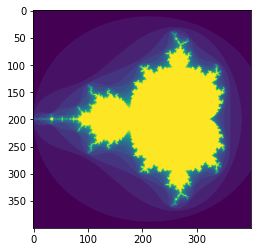

In [131]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

使用布尔值进行索引的第二种方法更类似于整数索引; 对于数组的每个维度，我们给出一个1D布尔数组，选择我们想要的切片：

In [132]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection
a[b1,:]                                   # selecting rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [133]:
a[b1]                                     # same thing

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [134]:
a[:,b2]                                   # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [135]:
a[b1,b2]                                  # a weird thing to do

array([ 4, 10])

### ix_()函数

[``ix_``](https://numpy.org/devdocs/reference/generated/numpy.ix_.html#numpy.ix_)函数可用于组合不同的向量，以便获得每个n-uplet的结果。例如，如果要计算从每个向量a，b和c中取得的所有三元组的所有a + b * c：

In [136]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax,bx,cx = np.ix_(a,b,c)
print(ax)
print(bx)
print(cx)
print(ax.shape, bx.shape, cx.shape)
result = ax+bx*cx
print(result)

[[[2]]

 [[3]]

 [[4]]

 [[5]]]
[[[8]
  [5]
  [4]]]
[[[5 4 6 8 3]]]
(4, 1, 1) (1, 3, 1) (1, 1, 5)
[[[42 34 50 66 26]
  [27 22 32 42 17]
  [22 18 26 34 14]]

 [[43 35 51 67 27]
  [28 23 33 43 18]
  [23 19 27 35 15]]

 [[44 36 52 68 28]
  [29 24 34 44 19]
  [24 20 28 36 16]]

 [[45 37 53 69 29]
  [30 25 35 45 20]
  [25 21 29 37 17]]]


In [137]:
result[3,2,4]

17

In [138]:
a[3]+b[2]*c[4]

17

您还可以按如下方式实现reduce：

In [139]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

In [140]:
# 然后将其用作：
ufunc_reduce(np.add,a,b,c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])